# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn import metrics  
from sklearn.metrics import (f1_score,accuracy_score,recall_score, precision_score,confusion_matrix,roc_auc_score,plot_confusion_matrix) 
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [261]:
churn_data = pd.read_csv("data_sets/BankChurners.csv")

<IPython.core.display.Javascript object>

## Data Overview

### Checking the shape of the dataset

In [262]:
# Checking the number of rows and columns in the data
churn_data.shape

(10127, 21)

<IPython.core.display.Javascript object>

**We have 10127 rows and 21 columns in the data set**

In [263]:
#Copy data to new df to keep original dataset untouched
data = churn_data.copy()

<IPython.core.display.Javascript object>

### Checking the first and last few rows of the dataset

In [264]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [265]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

* Data set comprises of 10 int, 5-floats and 5 object columns
* We also observe missing values in Education_Level  & Marital_Status columns

### Checking for duplicate values

In [267]:
# Check for duplicated values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [268]:
data.loc[data.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


<IPython.core.display.Javascript object>

* There are no duplicated rows in the dataset

### Checking for missing values

In [269]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

* We  observe missing values in Education_Level  & Marital_Status columns

### Statistical summary of the dataset

In [270]:
#Statistical summary of numerical columns
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


<IPython.core.display.Javascript object>

In [271]:
#Statistical summarry of object columns
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

### Data Overview Summary

* The average customer age is 46 which represents more than 50% 
* The average dependent count is 2 with more than 75% of customers having more than 3 dependants
* Majority of the customers have an average months on book of 35 months. With more than 75% having a period of 40 months relation with the bank.
* Majority of customers have more than 3 products subscribed with 50% having more than 4 products subscribed with the bank
* We do not have customers who are inactive for 12 months , however we observe that the average tenor of inactivity is 2 months representing more thab 50% of the observations
* The average number of contacts with the bank is 2 representing 50% of the observations
* The mean credit limit is 8600 with more than 75% of the customers having a credit limit of 11k and above
* The average total revolving balance is 1,162. No observations on zero revolving balance meaning that we have few customers with revolving balances.
* The mean open to buy (amount left for customer to use) is 7,469. We also observe that more than 50% have an Avg_Open_To_Buy of 3,474
* We observe an outlier of 34,516 which needs further investigation
* The average change in transaction amount is 0.76. Closely representing 50% of total observations
* The average total transaction amount is 4,404 for the past 12 months representing 75% of the total observations
* The average total transaction count for the last past 12 months is 64 transactions
* The average change in transaction count for Q4 over Q1 is 0.712 closely representing 50% of total observations and an increase of 71% over the period
* The average card utilization ratio is 0.275 , we can infer an increase in spending of 0.275 over the period
* We also observe 75% of observations having an average utilziation ratio of 0.5
* Exissting customers are more than Attrited customers representing 8500 of the total observations
* We have 2 genders. Majority of the customers are Gender Female with a frequency of 5358
* We have 6 education levels. Majority of the customers have attained Graduate education level represening 3128
* Majority of the customer have Married marital staus representing 4687 count
* We have 6 income categories and also observe that most of the customers have an income of less than 40$ representing 3561 
* We have 4 card categories and Blue is the most preferred card categiry representing 9436

## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other? 

In [272]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [273]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [274]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [275]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Univariate Analysis

`Customer_Age`

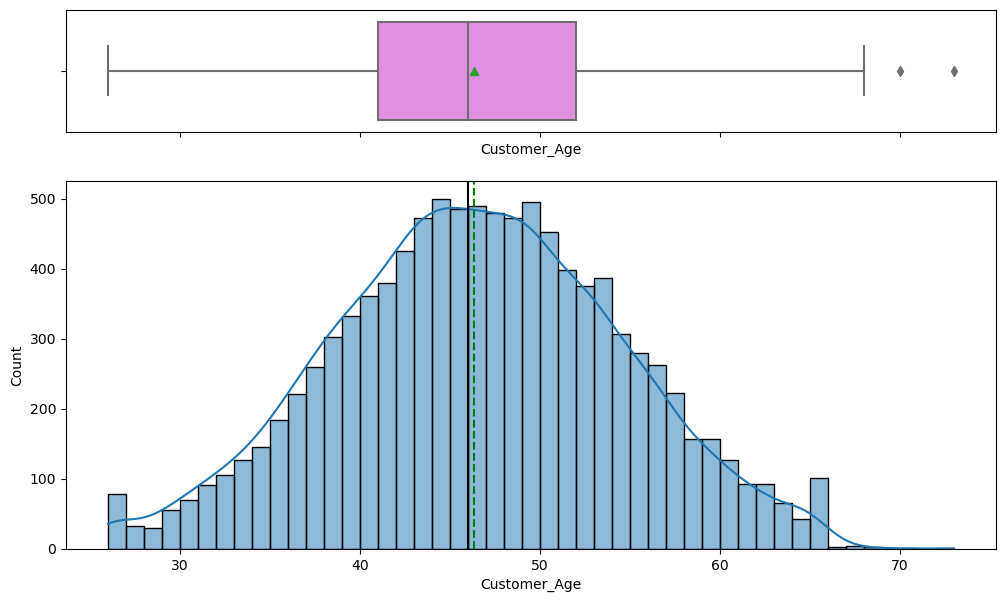

<IPython.core.display.Javascript object>

In [276]:
histogram_boxplot(data, "Customer_Age", kde=True)

* Distribution for Customer Age is normal with slight right skewness
* We observe a few outliwers in this column

`Months_on_book`

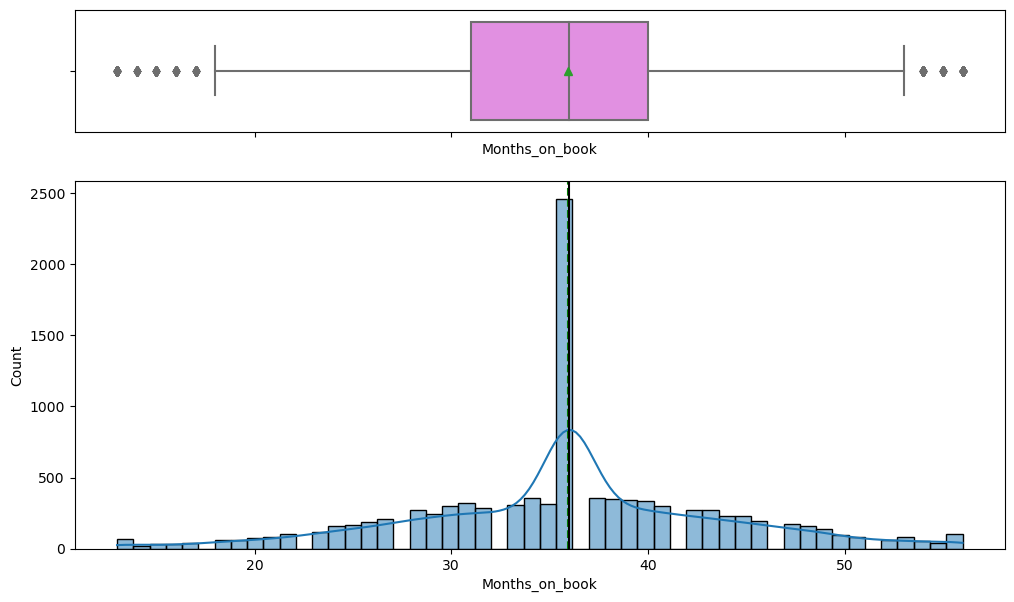

<IPython.core.display.Javascript object>

In [277]:
histogram_boxplot(data, "Months_on_book", kde=True)

* The distribution of Months_on_book is sparse
* Outliers are observed in this column

`Credit_Limit`

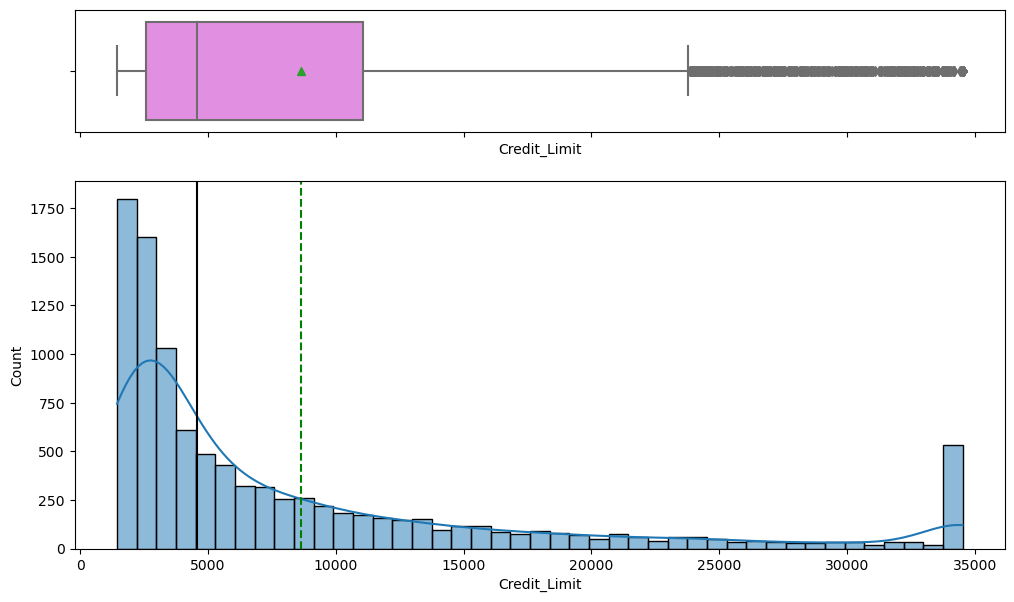

<IPython.core.display.Javascript object>

In [278]:
histogram_boxplot(data, "Credit_Limit", kde=True)

* The distribution of Credit Limit is right skewed
* We observe many outliers in this column

`Total_Revolving_Bal`

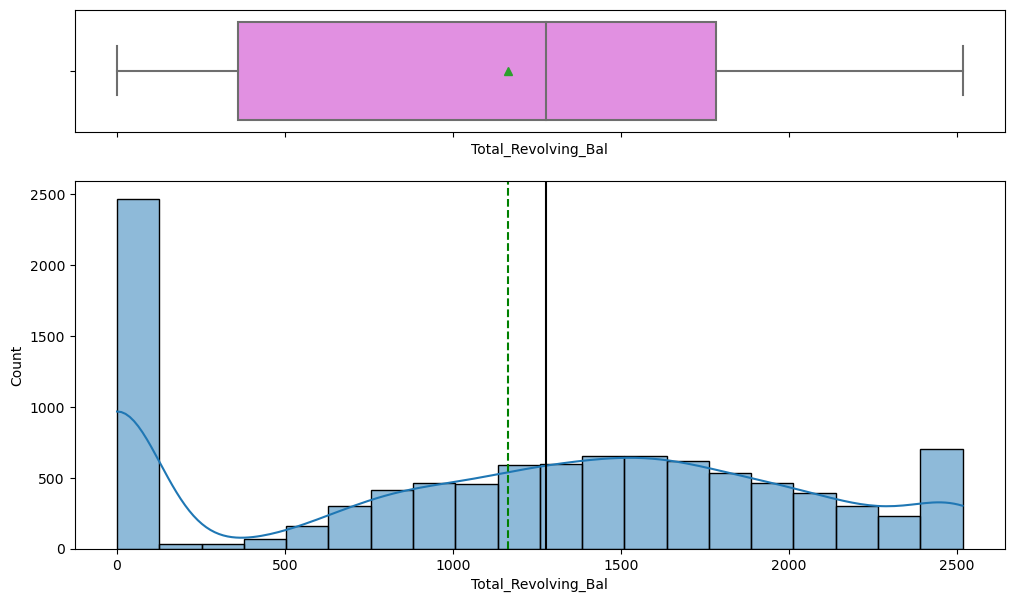

<IPython.core.display.Javascript object>

In [279]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

* Total_Revolving_Bal is left skewed


`Avg_Open_To_Buy`

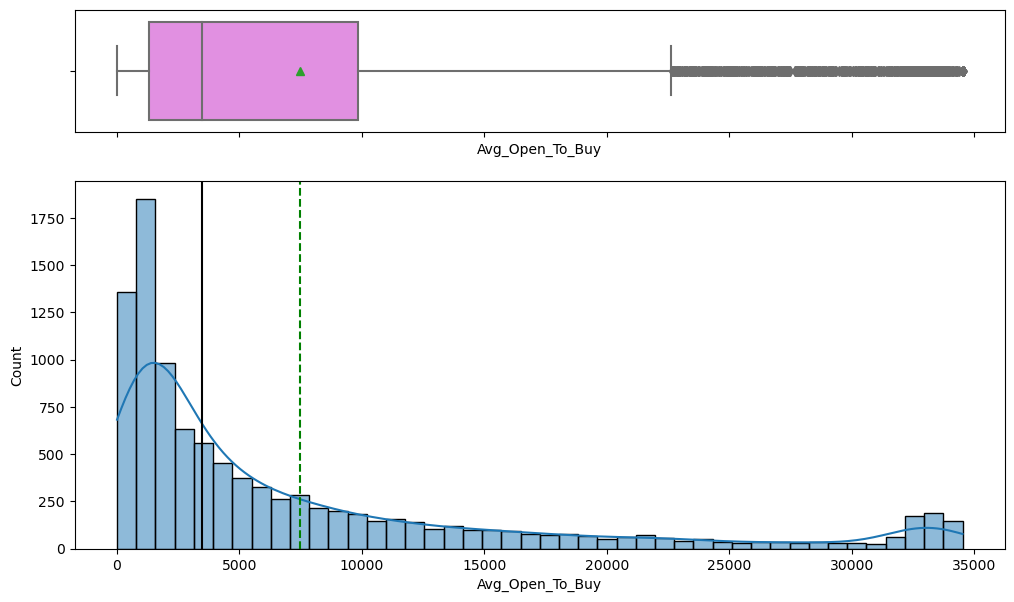

<IPython.core.display.Javascript object>

In [280]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

* The distribution of Avg_Open_To_Buy is skewed to the right
* Many outliers are observed in this column

`Total_Trans_Ct`

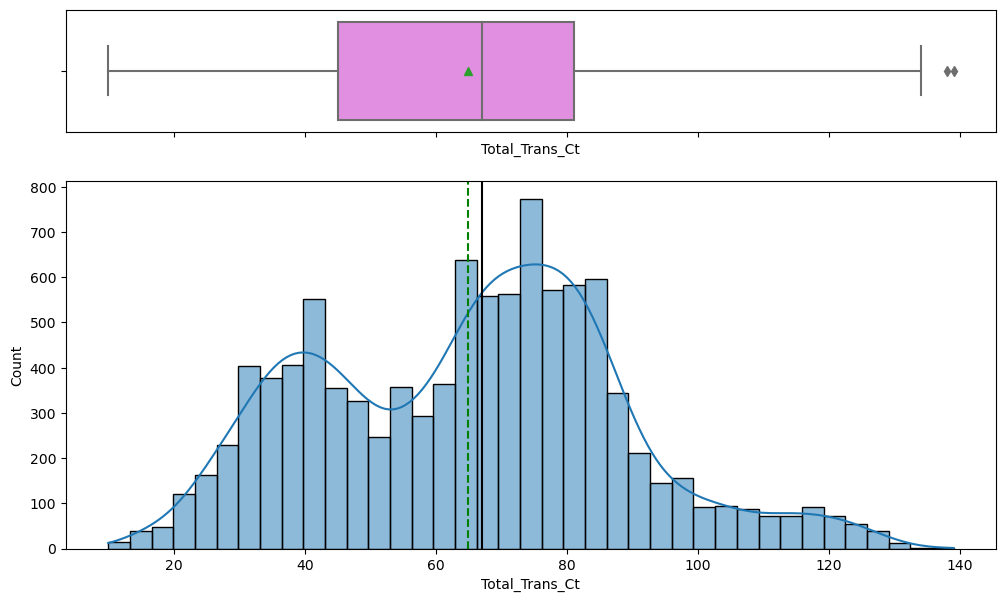

<IPython.core.display.Javascript object>

In [281]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

* Total_Trans_Ct distribution appears normal with some slight skeweness to the left
* A few outliers are observed in this column

`Total_Amt_Chng_Q4_Q1`

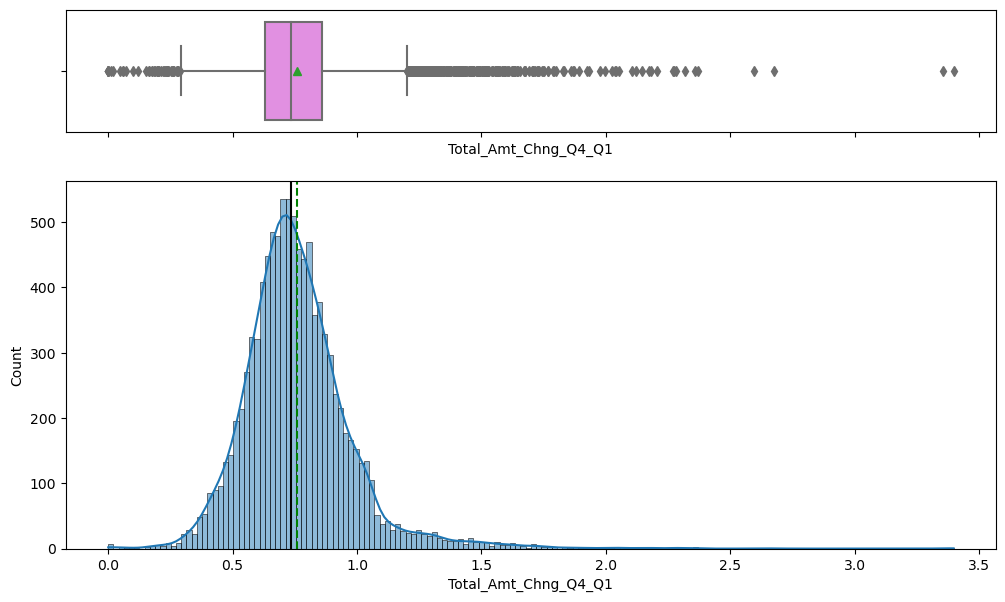

<IPython.core.display.Javascript object>

In [282]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

* Total_Amt_Chng_Q4_Q1 distribution column has many outliers
* Distribution is right skewed

`Total_Trans_Amt`

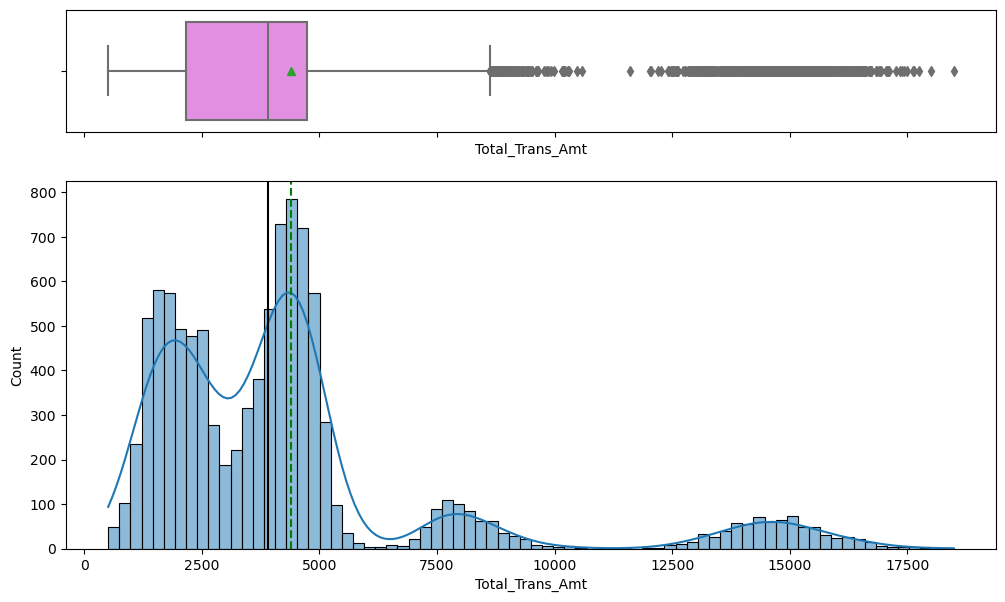

<IPython.core.display.Javascript object>

In [283]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

* Total_Trans_Amt distribution column has many outliers
* Distribution is right skewed

`Total_Ct_Chng_Q4_Q1`

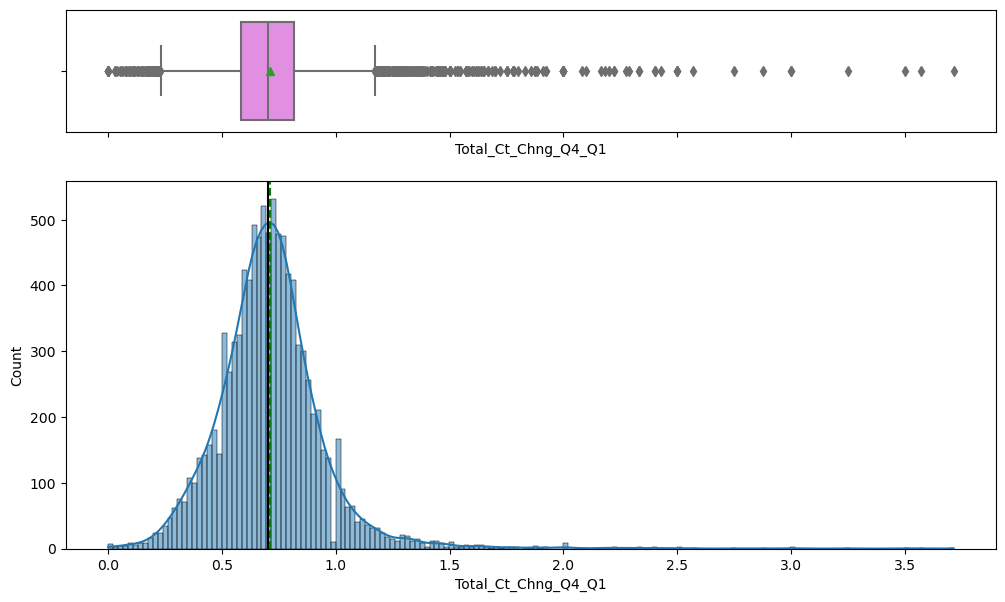

<IPython.core.display.Javascript object>

In [284]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

* Total_Ct_Chng_Q4_Q1 column is right skewed
* The column has many outliers that need to be treated

`Avg_Utilization_Ratio`

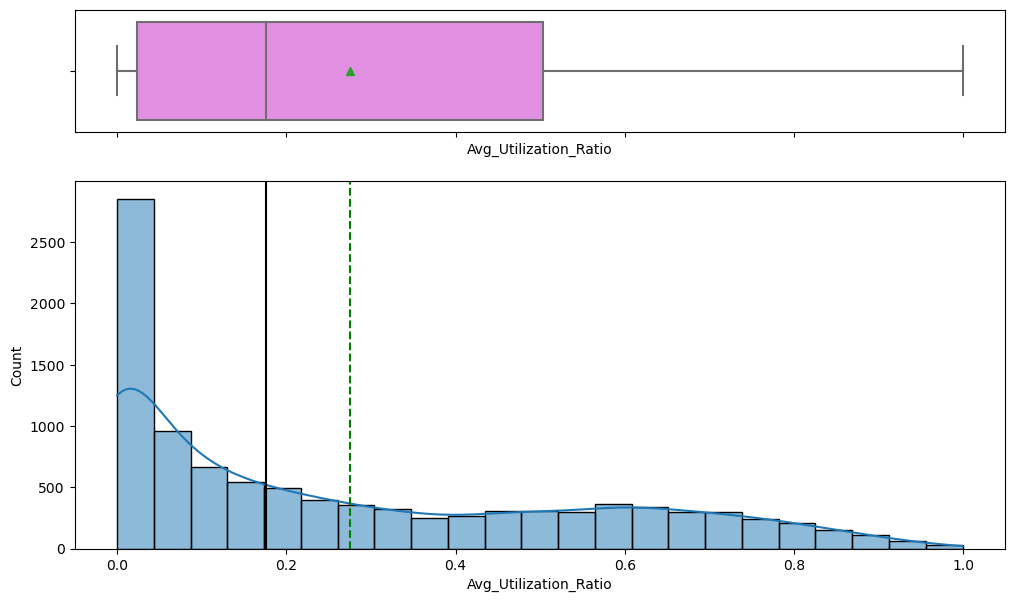

<IPython.core.display.Javascript object>

In [285]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

* Avg_Utilization_Ratio column distribution is skewed to the right

`Dependent_count`

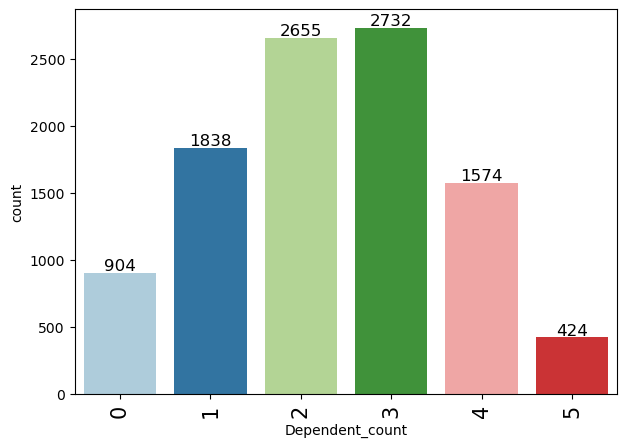

<IPython.core.display.Javascript object>

In [286]:
labeled_barplot(data, "Dependent_count")

* Majority of the customers have a dependent count of 2  & 3 followed by 1, 4 0 and 5 respectively

`Total_Relationship_Count`

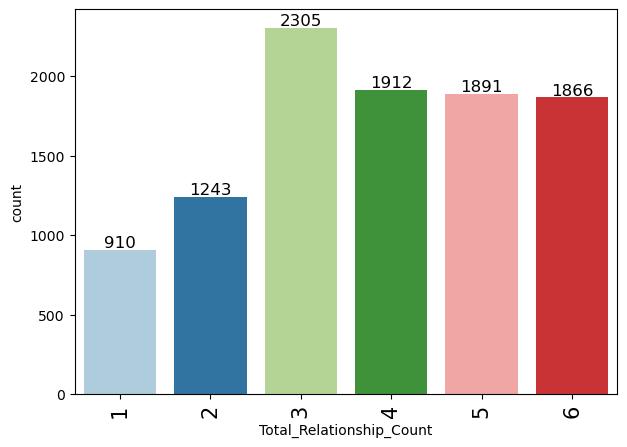

<IPython.core.display.Javascript object>

In [287]:
labeled_barplot(data, "Total_Relationship_Count")

* Majority of the customers have a total no. of product count of  3 followed by 4, 5, 6, 2, & 1 respectively

`Months_Inactive_12_mon`

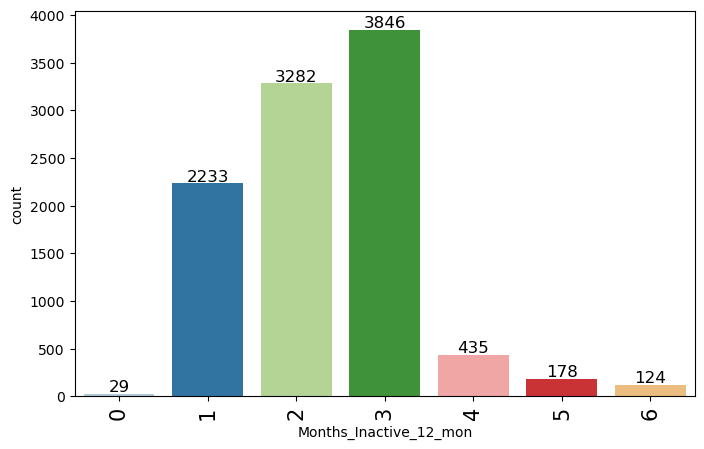

<IPython.core.display.Javascript object>

In [288]:
labeled_barplot(data, "Months_Inactive_12_mon")

* We observe that no customers have been inactive for 12 months
* We however observe the highest number of inactive months being 3,2,1 
* We have a few customers inactive for 4, 5 & 6 months as well

`Contacts_Count_12_mon`

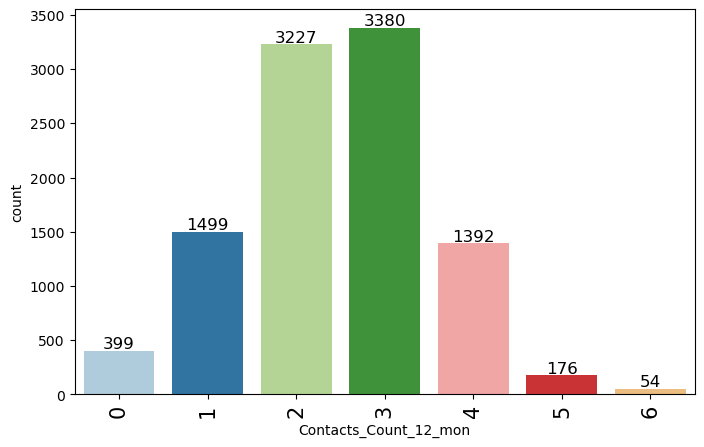

<IPython.core.display.Javascript object>

In [289]:
labeled_barplot(data, "Contacts_Count_12_mon")

* We observe majority of the customers have having contact with the bank 3 & 2 times at 3380 and 3227 respectively
* We observe a fewer count of 5 & 6 contacts respectively

`Gender`

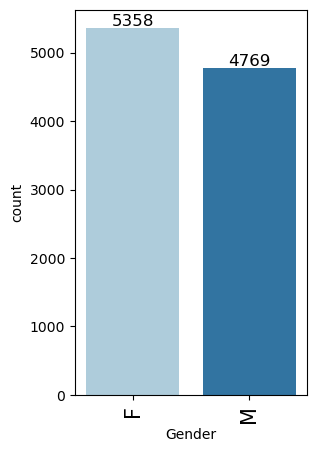

<IPython.core.display.Javascript object>

In [290]:
labeled_barplot(data, "Gender")

* The gender seems equally balance but we observe a higher number of female customers than male customers

`Education_Level`

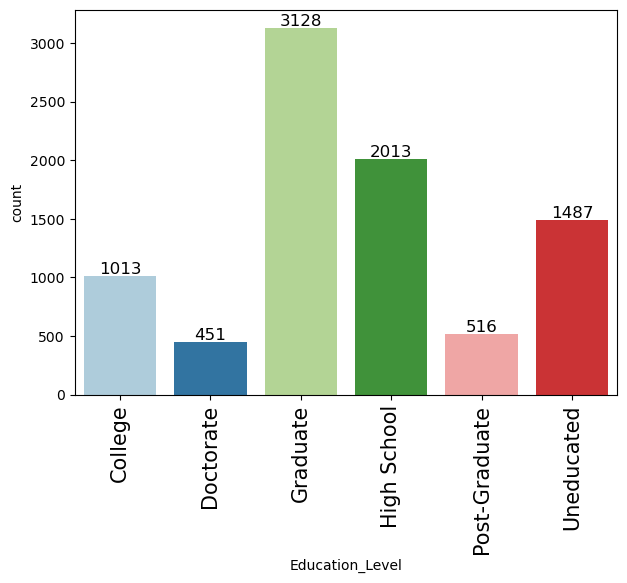

<IPython.core.display.Javascript object>

In [291]:
labeled_barplot(data, "Education_Level")

* Majority of the customers are graduates with 3128 and high school with 2013
* We also a higher count of uneducated customers at 1487 following closely

`Marital_Status`

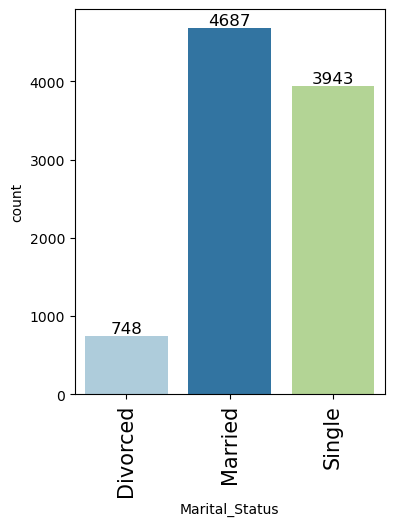

<IPython.core.display.Javascript object>

In [292]:
labeled_barplot(data, "Marital_Status")

* Majority of the customers are married at 4687 followed by Single marital status at 3943
* We also observe a fewer count of customers with Divorced marital status

`Income_Category`

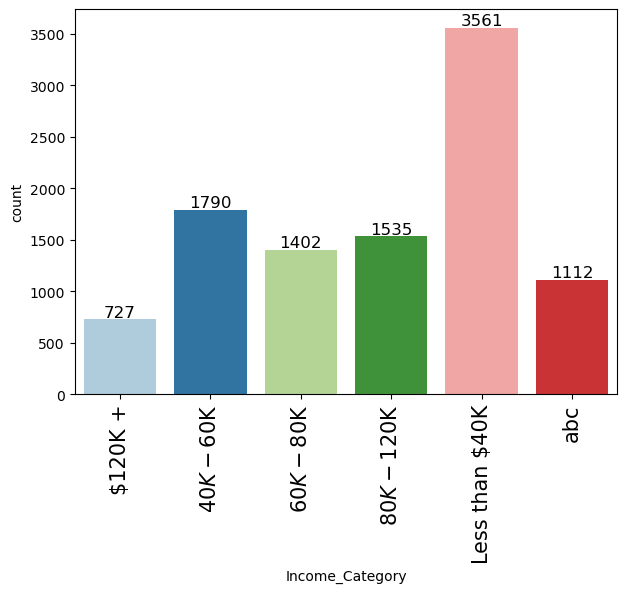

<IPython.core.display.Javascript object>

In [293]:
labeled_barplot(data, "Income_Category")

* Averagely we also observe that most customers within the income category of 40 to 10k
* We also have a higher count of customers with an income of less than $40 k

`Card_Category`

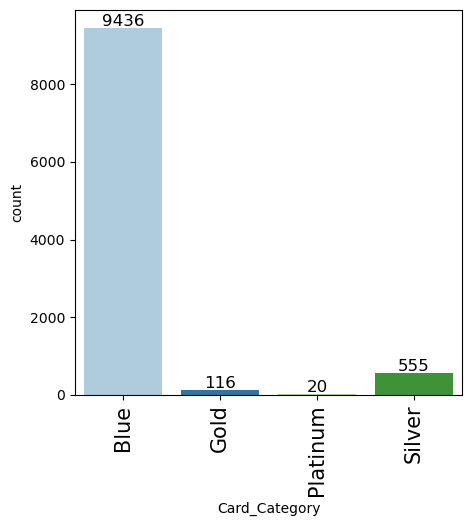

<IPython.core.display.Javascript object>

In [294]:
labeled_barplot(data, "Card_Category")

* We observe that the Blue card product/type is most subscribed product
* Gold, platinum, silver card types have a lower uptake

`Attrition_Flag`

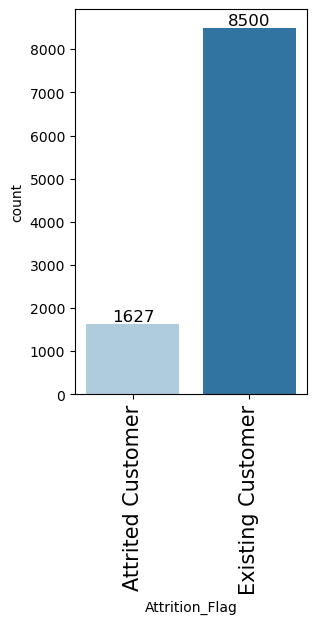

<IPython.core.display.Javascript object>

In [295]:
labeled_barplot(data, "Attrition_Flag")

* Attrition_Flag column is imbalanced.
* We have 1627 attrited customers compared to 8500 non attrited (Existing) customers

### Bivariate Analysis

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

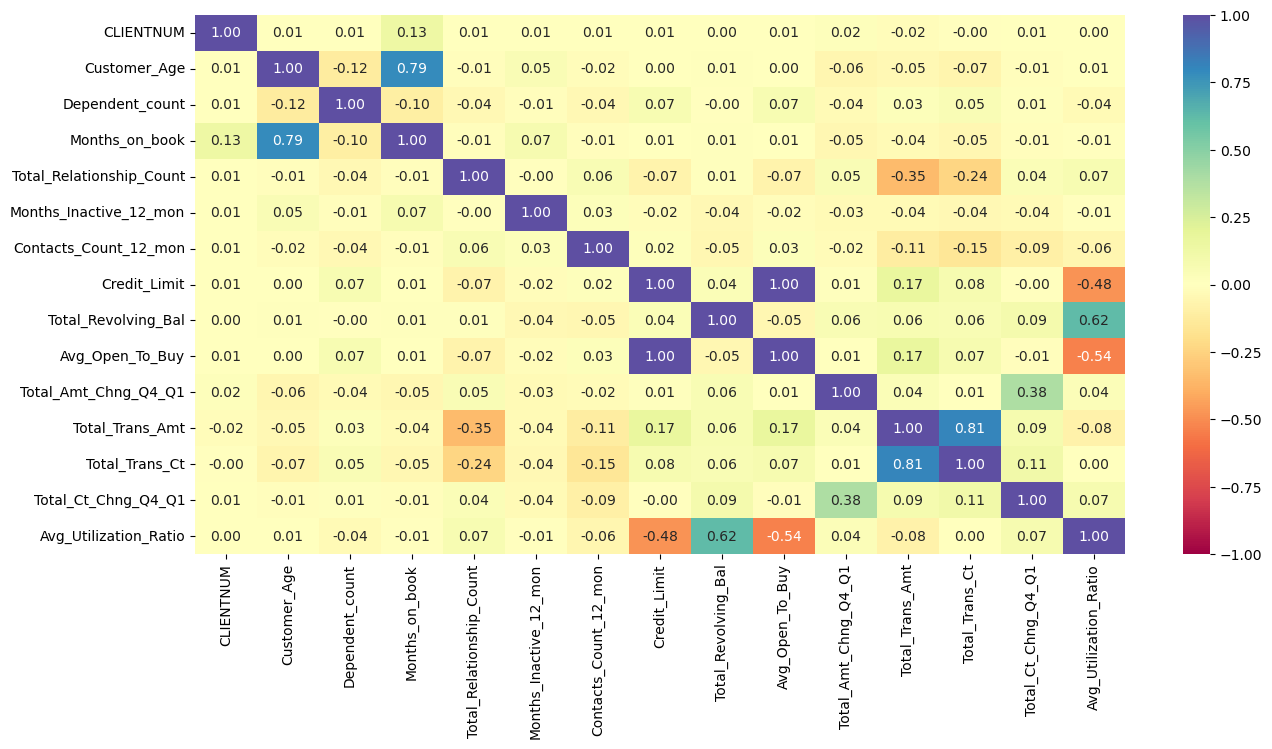

<IPython.core.display.Javascript object>

In [296]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


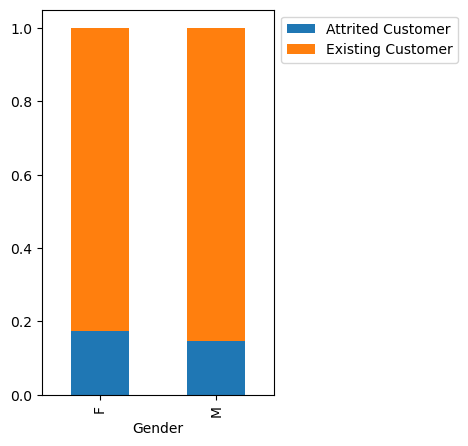

<IPython.core.display.Javascript object>

In [297]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


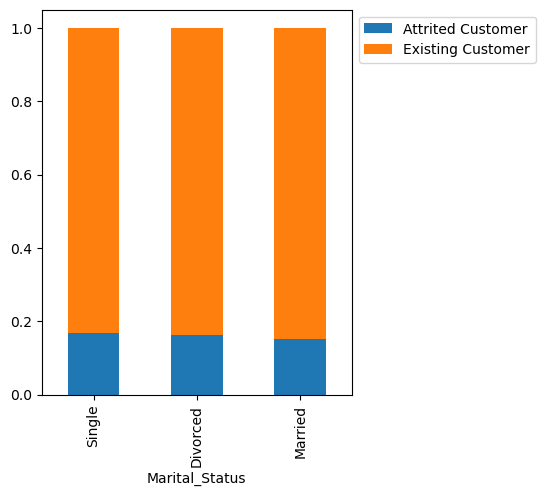

<IPython.core.display.Javascript object>

In [298]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag")

* We observe an almost equal number of customers attrited across customers with difference marital status in the dataset
* Single customers are most likely to get attrited compared to divorced and married customers

`Attrition_Flag vs Education_Level`

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


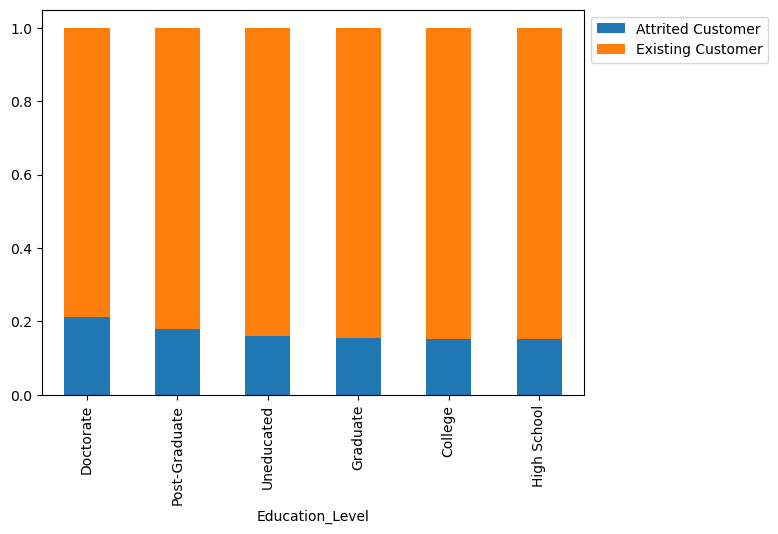

<IPython.core.display.Javascript object>

In [299]:
stacked_barplot(data,"Education_Level", "Attrition_Flag") 

* Customers with doctorate education level are most likely to get attrited while highschool are least likely to get attrited

`Attrition_Flag vs Income_Category`

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


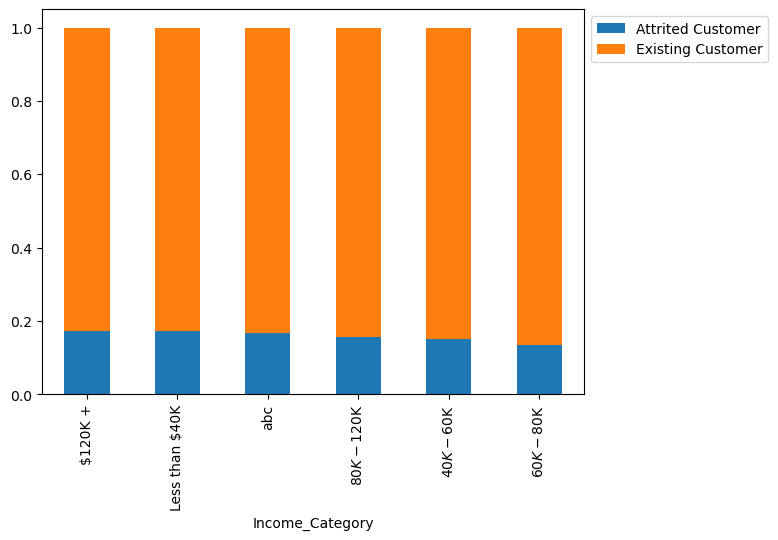

<IPython.core.display.Javascript object>

In [300]:
stacked_barplot(data,"Income_Category", "Attrition_Flag") 

* Customers with incomes of 120k+ and incomes of less than 40k$ are most likely to get attrited.
* Customers with incomes of 40k to 60k and 60k to 80k are least likely to get attrited.

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


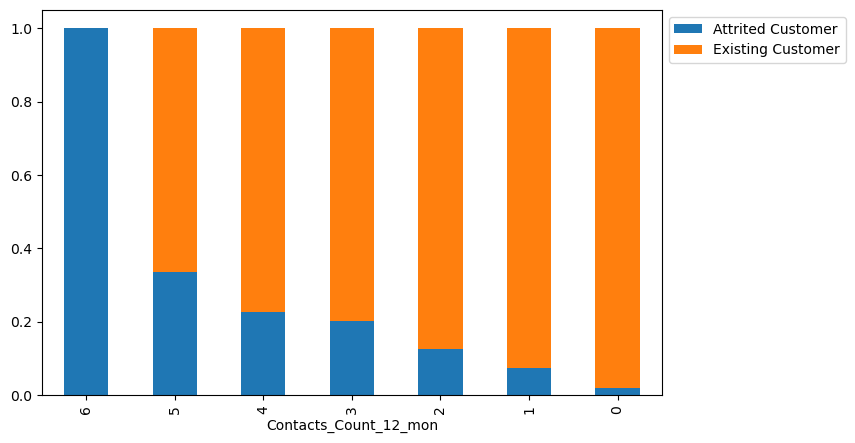

<IPython.core.display.Javascript object>

In [301]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag") 

* Customers who have the highest number of contacts with the bank are most likley to get attrited compared to customers who hav not contacted the bank for the last 12 months

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


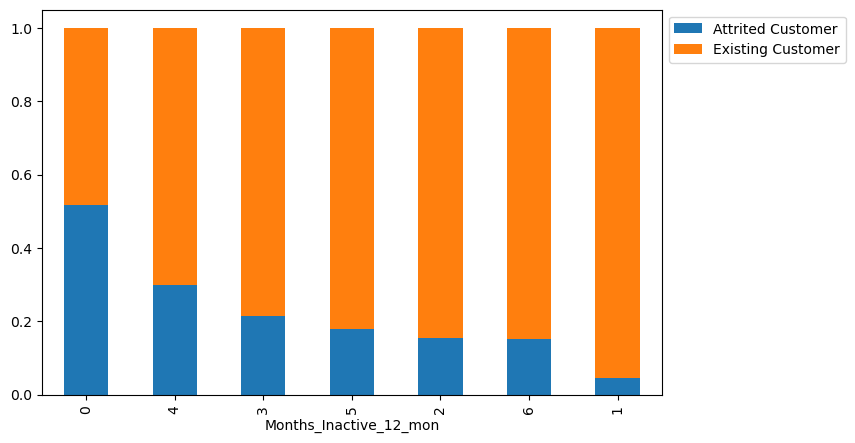

<IPython.core.display.Javascript object>

In [302]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag") 

* We observe that customer whon have been inactive for long are less likley to get attrited compared to active customers. 
* This could be due to that some customers may opt to stop using the card services as opposed to closing their accounts

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


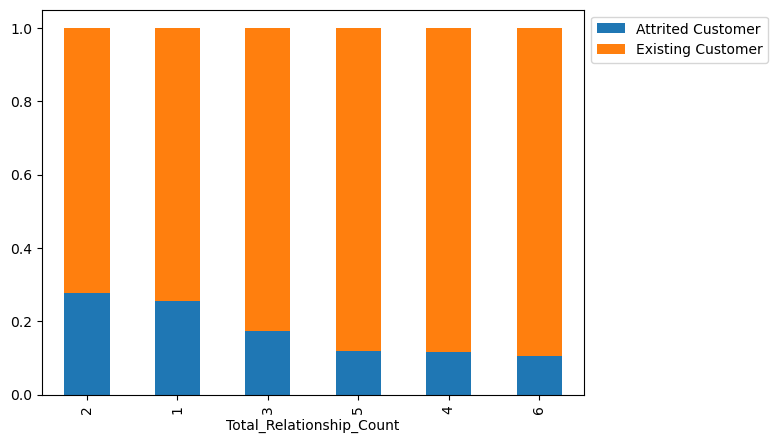

<IPython.core.display.Javascript object>

In [303]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") 

* We observe that customers with more products with the bank are less likely to get attrited than customers with fewer products

`Attrition_Flag vs Dependent_count`

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


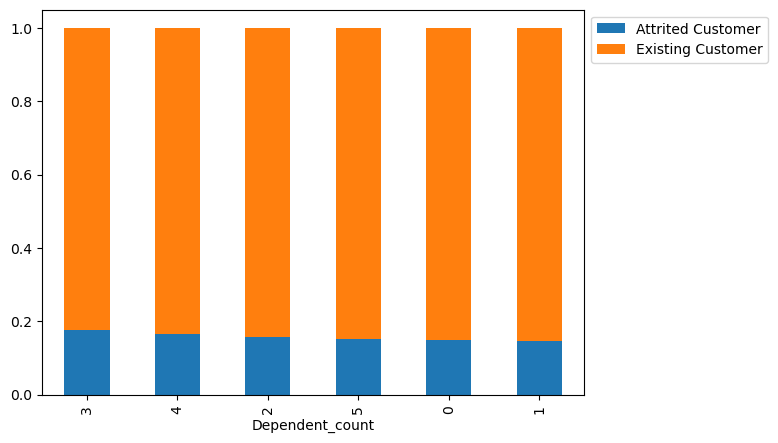

<IPython.core.display.Javascript object>

In [304]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag") 

* Customers with 3 & 2 dependants  are most likely to get attrited than customers with 1,4,0 and 5 dependent count

`Total_Revolving_Bal` vs `Attrition_Flag`

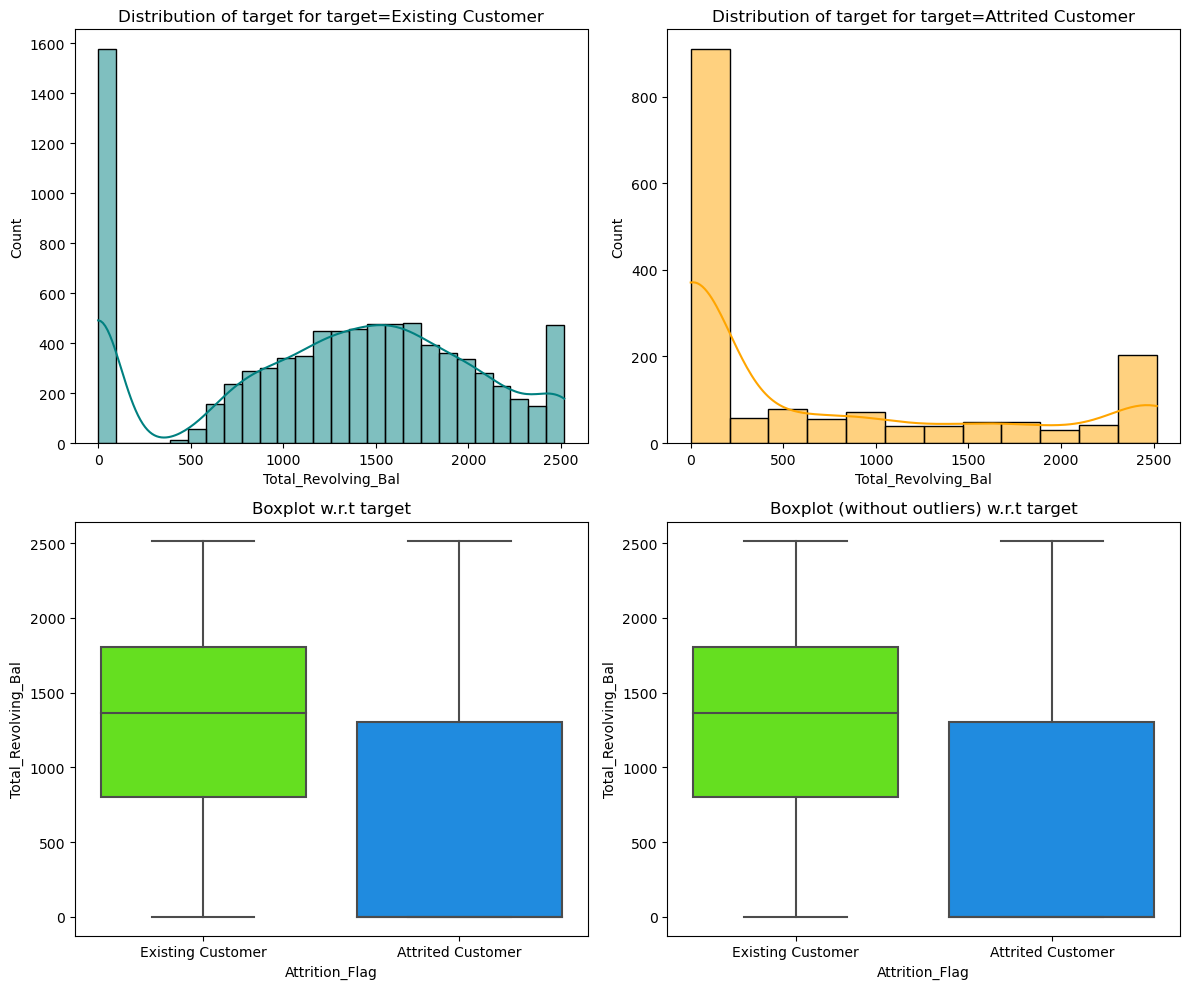

<IPython.core.display.Javascript object>

In [305]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* Customers with zero to 1300 total revolving balance are most likely to get attrited with zero reovloving balance represetning the highest count


`Attrition_Flag vs Credit_Limit`

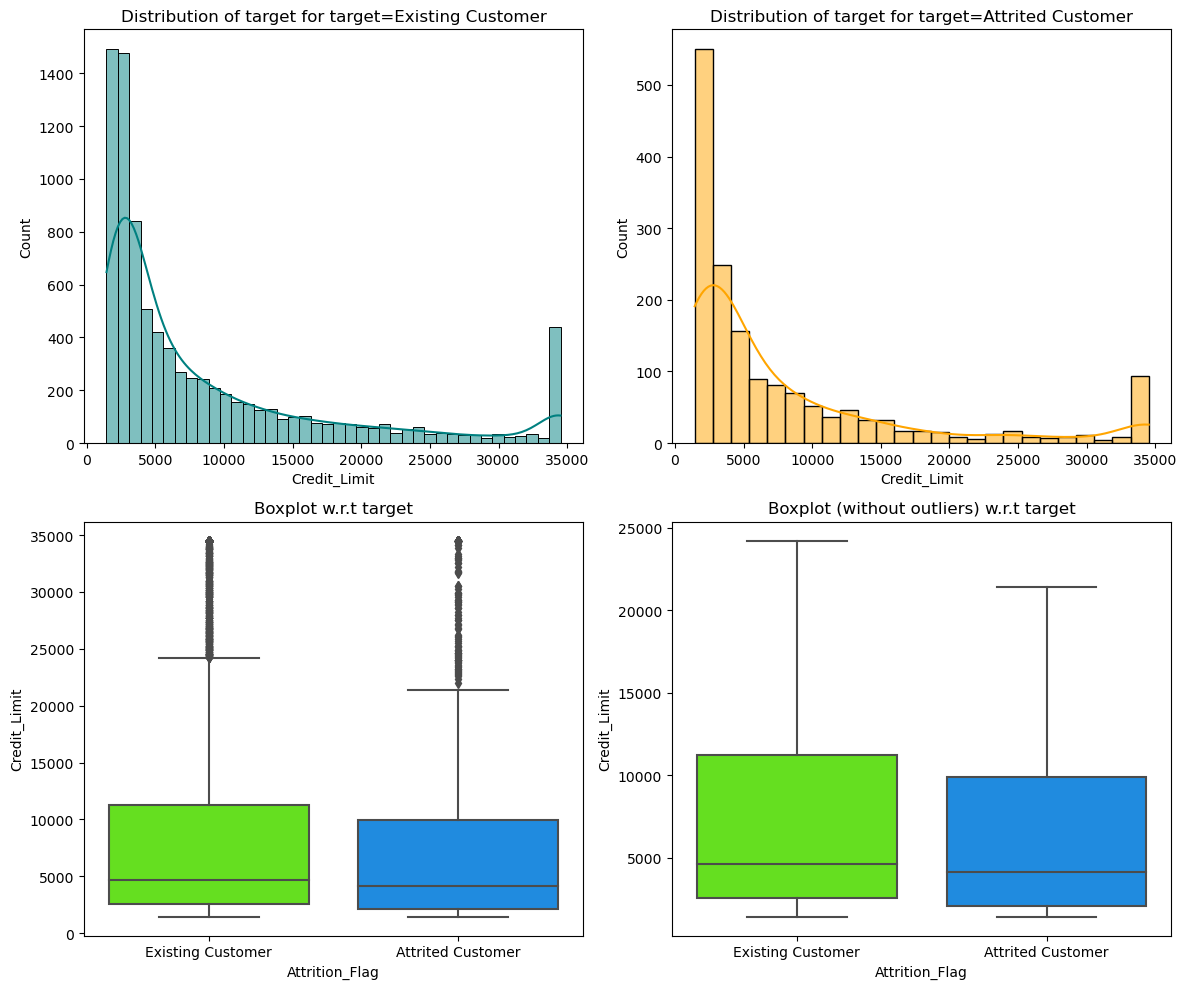

<IPython.core.display.Javascript object>

In [306]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

* Customers with lower credit limit are most likely to get attrited than customers with a higher credit limit

`Attrition_Flag vs Customer_Age`

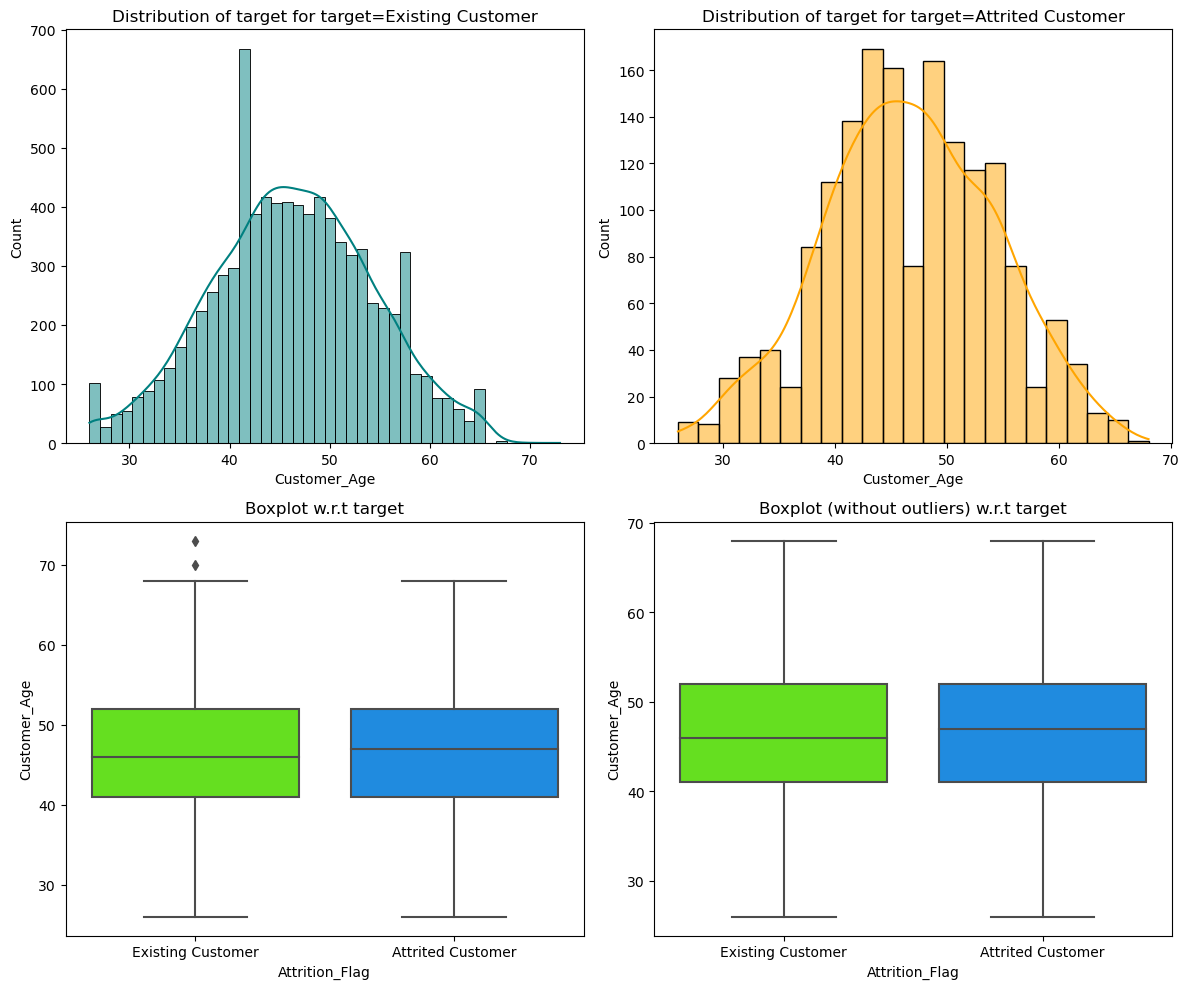

<IPython.core.display.Javascript object>

In [307]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag") 

* We observe an almost equal number of attrited and Existing custmers normally distributed across customer age

`Total_Trans_Ct` vs `Attrition_Flag`

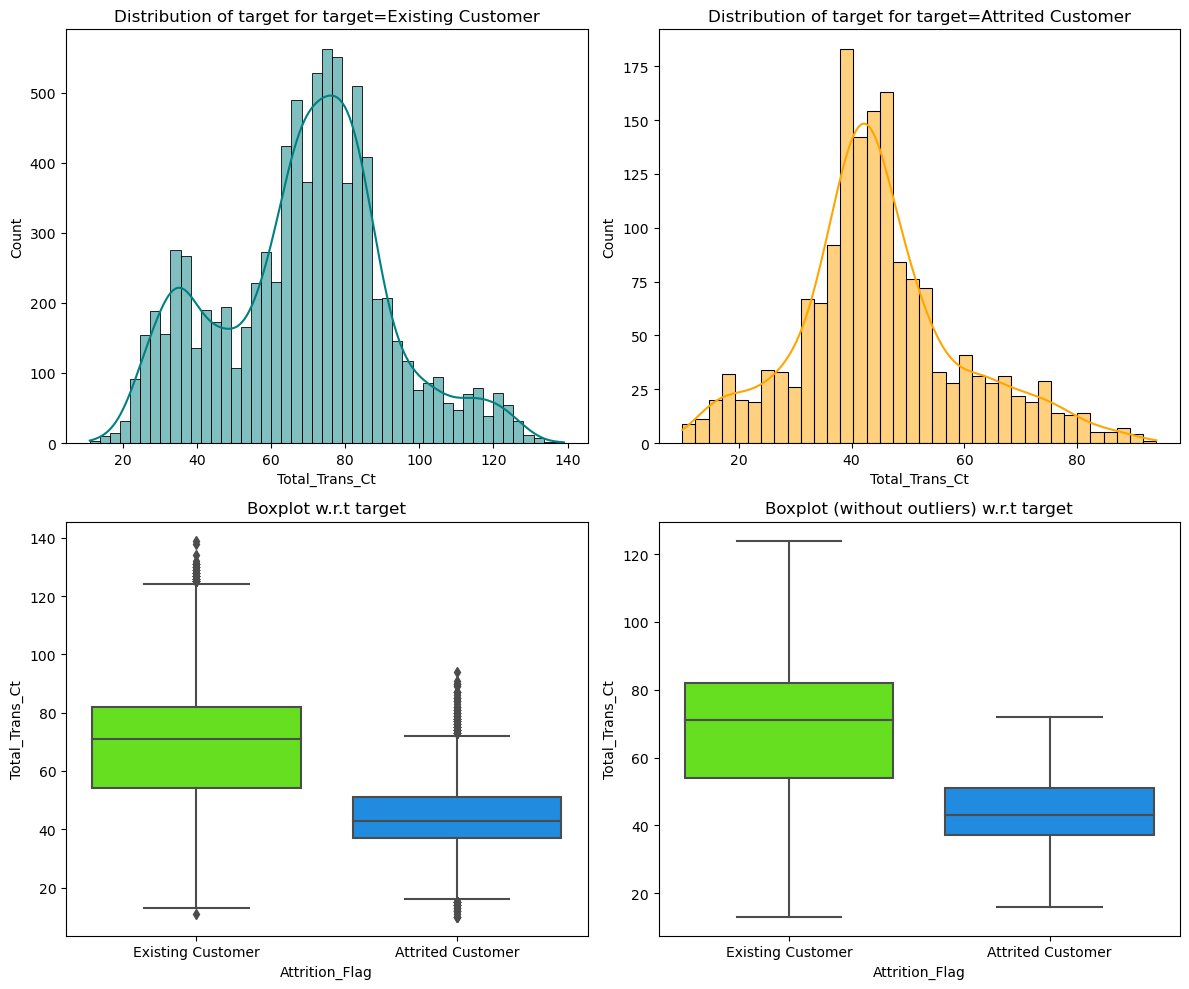

<IPython.core.display.Javascript object>

In [308]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") 

* Customers with a higher transaction count in the last 12 months are less likely to get attrited than customers with a low transaction count


`Total_Trans_Amt` vs `Attrition_Flag`

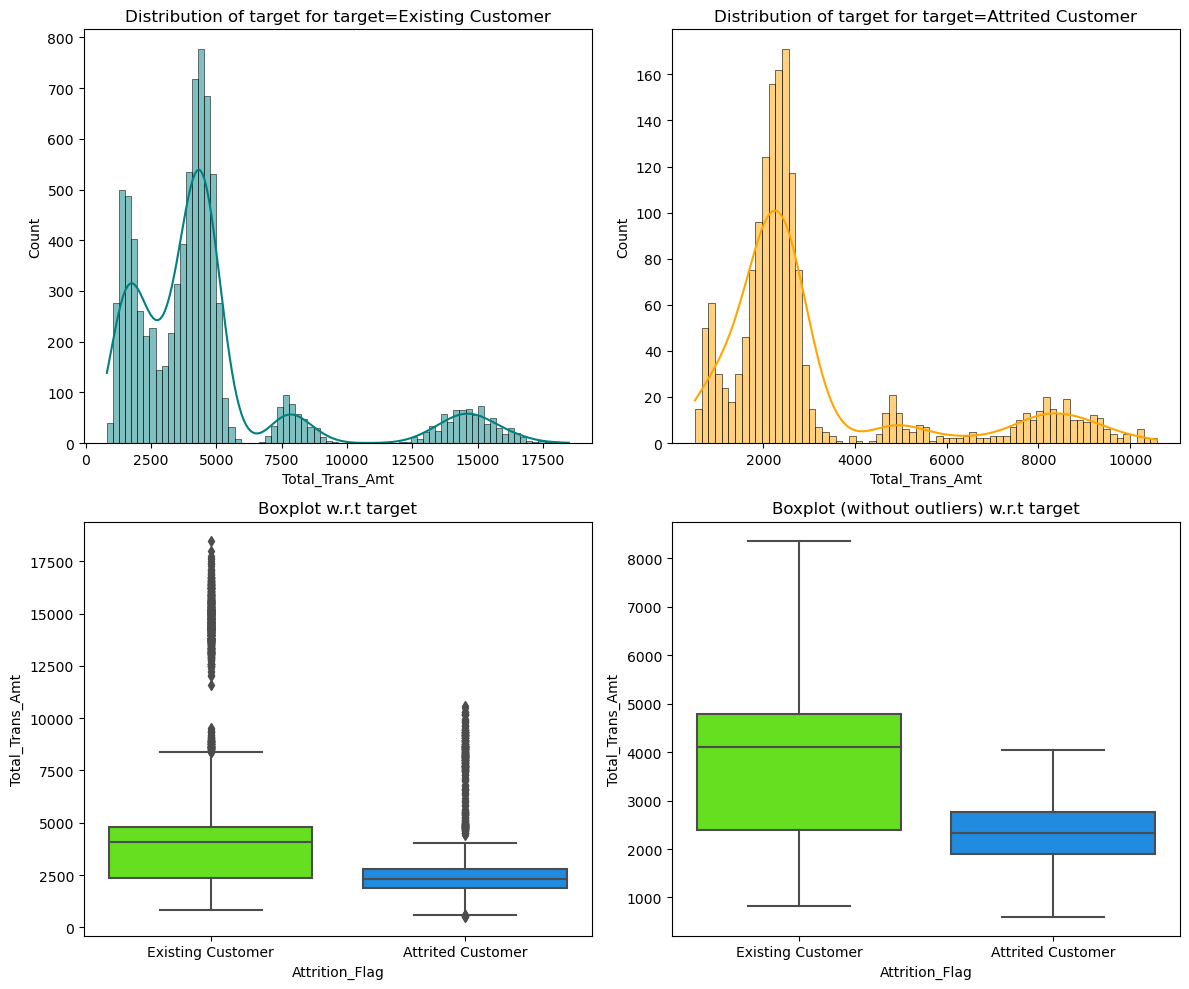

<IPython.core.display.Javascript object>

In [309]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Customers with higher transaction voiumes are less likely to get attrited than customers with lower transaction amounts


`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

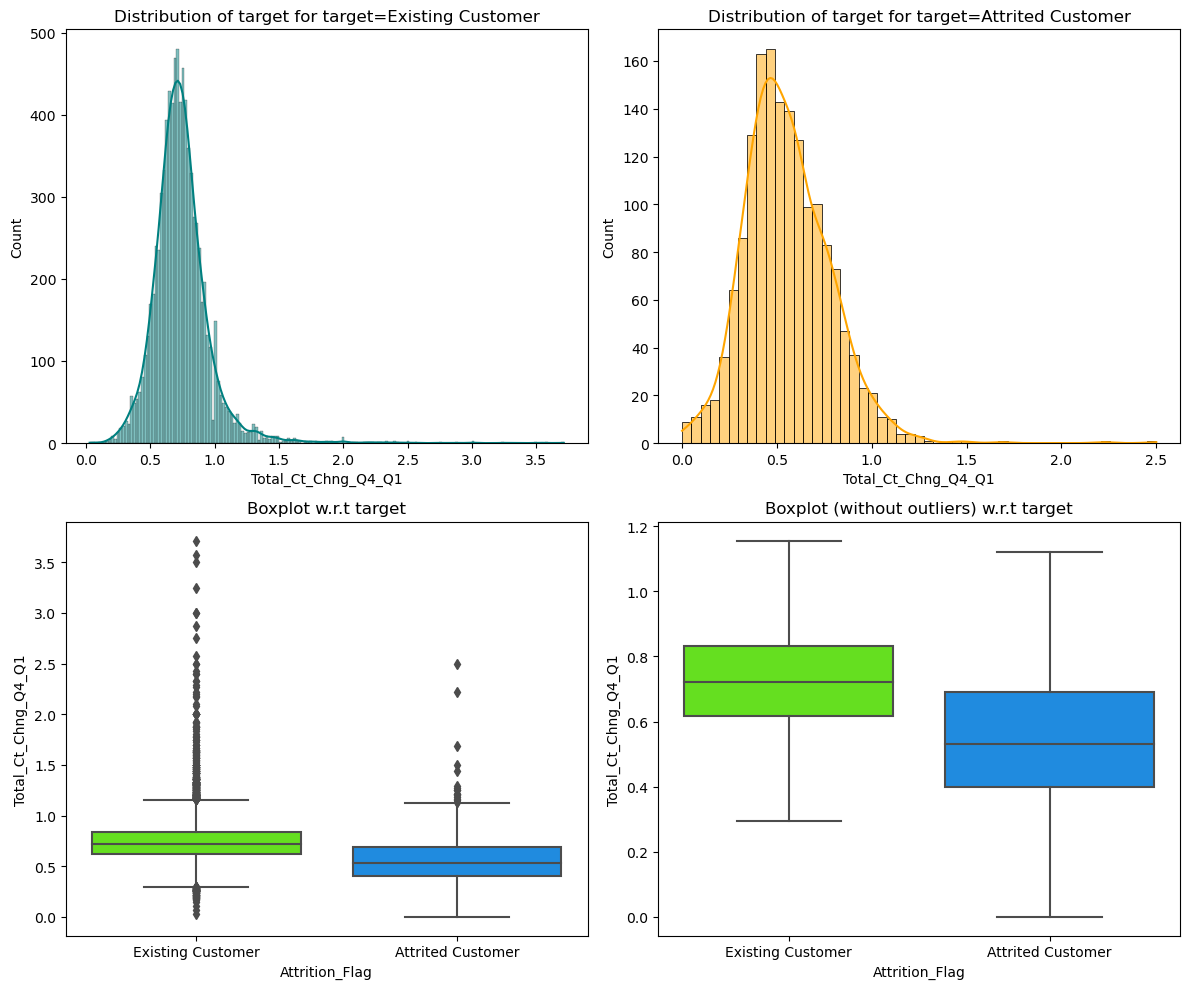

<IPython.core.display.Javascript object>

In [310]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") 

* We observe that customers with a total transaction count change of 0.5 have the hightest attrition

`Avg_Utilization_Ratio` vs `Attrition_Flag`

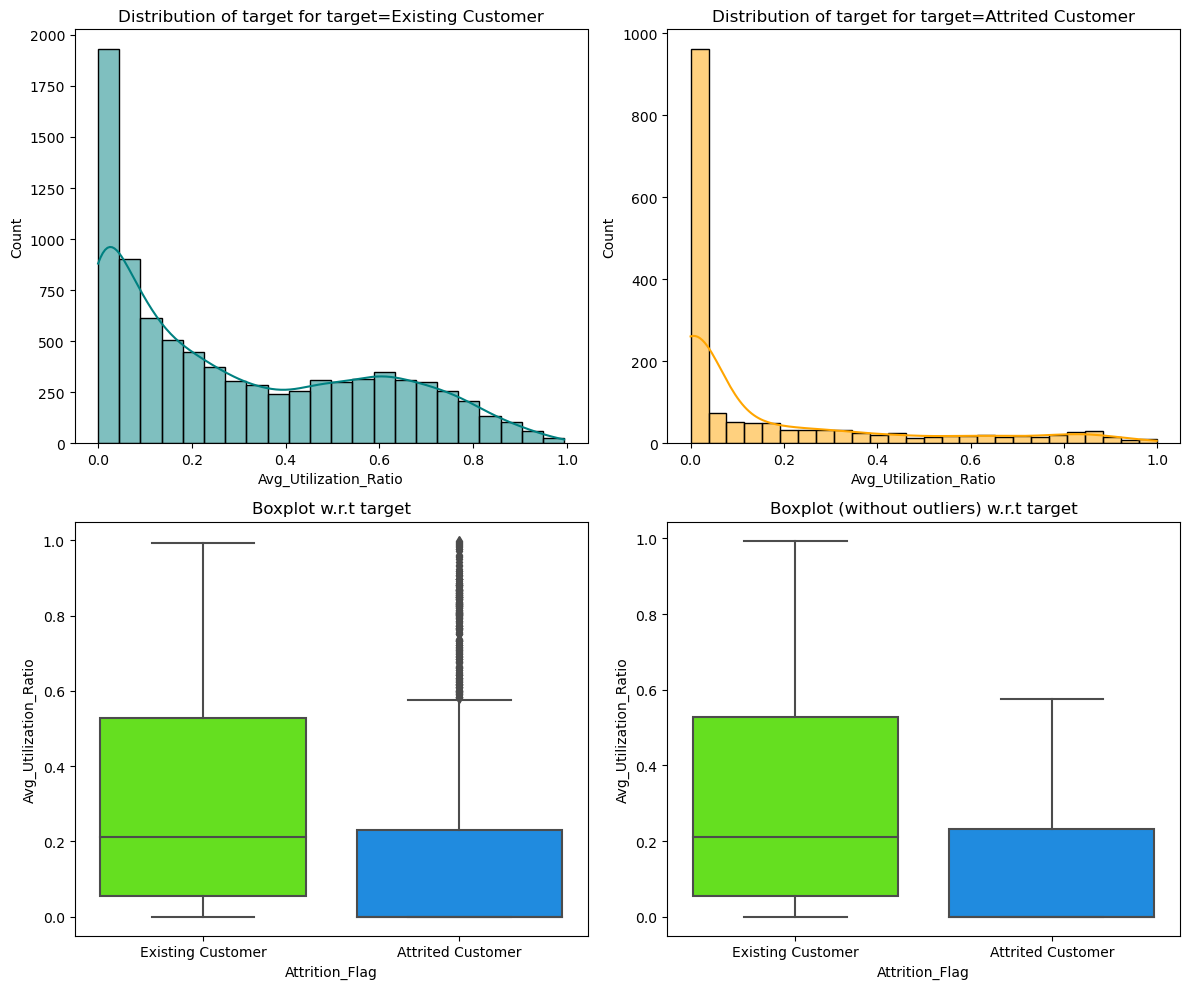

<IPython.core.display.Javascript object>

In [311]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") 

* Customers with avg utilization ratio of 0 to 0.2 represent the highest number of attrited customers in the dataset
* We can infer that the higher the avg utilization ration the less likely a customer will get attrited


`Attrition_Flag vs Months_on_book`

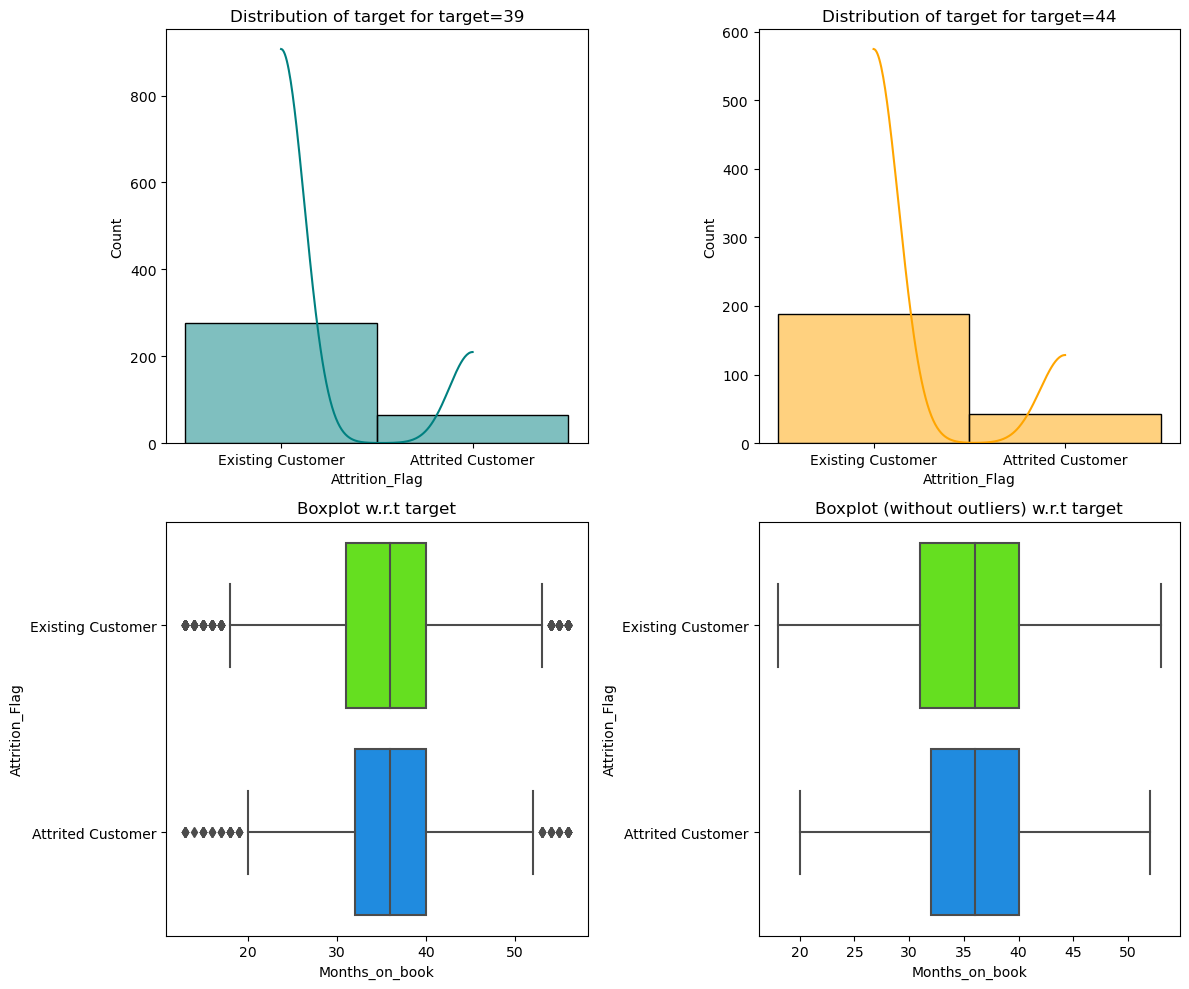

<IPython.core.display.Javascript object>

In [312]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") 

* Customers with a months on book between 30 and 40 are most likely to get attrited.
* We also observe similar observation on existing customers with months on book on between 30-40

`Attrition_Flag vs Avg_Open_To_Buy`

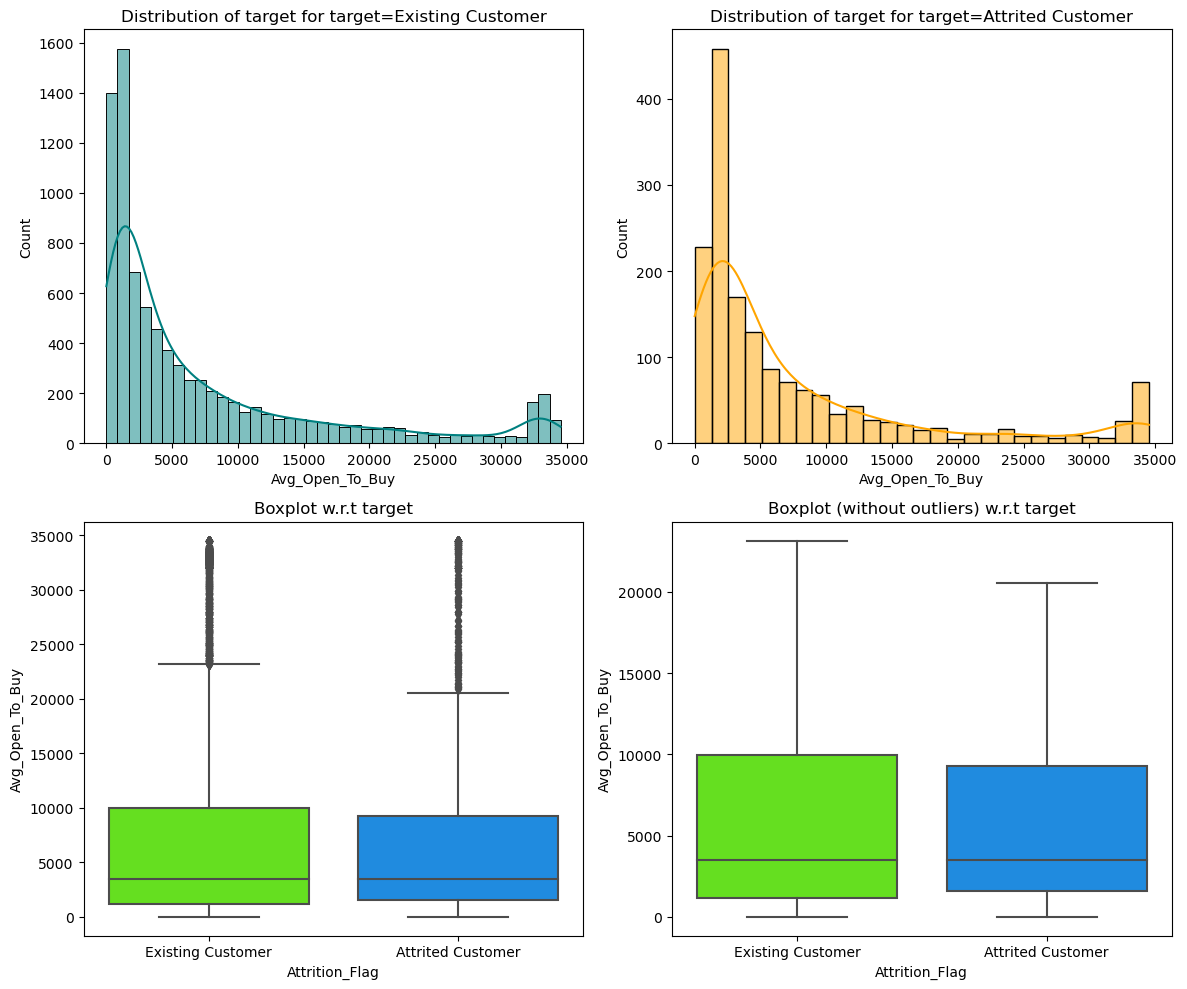

<IPython.core.display.Javascript object>

In [313]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag") 

* Customers with a higher Avg Open to buy are less likely to get attrited thann those with lower Avg Open to buy

## Data Preprocessing

**Dropping Client NUM Column**

In [314]:
data.drop("CLIENTNUM",axis=1,inplace=True)

<IPython.core.display.Javascript object>

**Treat Income Category for erroneous values**

In [315]:
data["Income_Category"].replace("abc", np.nan, inplace=True) 

<IPython.core.display.Javascript object>

### Outlier Detection

In [316]:
Q1 = data.quantile(0.25)  # To find the 25th percentile 
Q3 = data.quantile(0.75)  # To find the 75th percentile 

IQR = Q3 - Q1  


lower = (Q1 - 1.5 * IQR)  
upper = (Q3 + 1.5 * IQR)

<IPython.core.display.Javascript object>

In [317]:
# checking the % outliers 
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

<IPython.core.display.Javascript object>

* Outliers are within normal range hence no action to be taken

In [318]:
#encode target variables accordingly
data["Attrition_Flag"]=data["Attrition_Flag"].replace("Existing Customer",0)
data["Attrition_Flag"]=data["Attrition_Flag"].replace("Attrited Customer",1)

<IPython.core.display.Javascript object>

In [319]:
data["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

### Train-Test Split

In [320]:
df = data.copy()

<IPython.core.display.Javascript object>

In [321]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [322]:
#Using simple imputer to replace missing values
imputer = SimpleImputer(strategy="most_frequent")

<IPython.core.display.Javascript object>

In [323]:
#Split into independent and target variable
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [324]:
# Splitting  into training and validation sets

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2)  

X_test, X_val, y_test, y_val = train_test_split(X_train,y_train,test_size=0.25) 

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (2026, 19) (6075, 19)


<IPython.core.display.Javascript object>

### Missing value imputation

In [325]:
impute_records = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [326]:
# Imput train, test, validation data
X_train[impute_records] = imputer.fit_transform(X_train[impute_records])


X_val[impute_records]  = imputer.fit_transform(X_val[impute_records])


X_test[impute_records] =imputer.fit_transform(X_test[impute_records])

<IPython.core.display.Javascript object>

In [327]:
#Confirm missing value treatment/imputation
print("Train Data >>>> ")
print(X_train.isna().sum())
print("-" * 30)
print("Validation Data >>>> ")
print(X_val.isna().sum())
print("-" * 30)
print("Test Data >>>> ")
print(X_test.isna().sum())

Train Data >>>> 
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Validation Data >>>> 
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit     

<IPython.core.display.Javascript object>

### Encoding categorical variables

In [328]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 30) (2026, 30) (6075, 30)


<IPython.core.display.Javascript object>

In [329]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 8468 to 9399
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8101 non-null   int64  
 1   Dependent_count                 8101 non-null   int64  
 2   Months_on_book                  8101 non-null   int64  
 3   Total_Relationship_Count        8101 non-null   int64  
 4   Months_Inactive_12_mon          8101 non-null   int64  
 5   Contacts_Count_12_mon           8101 non-null   int64  
 6   Credit_Limit                    8101 non-null   float64
 7   Total_Revolving_Bal             8101 non-null   int64  
 8   Avg_Open_To_Buy                 8101 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            8101 non-null   float64
 10  Total_Trans_Amt                 8101 non-null   int64  
 11  Total_Trans_Ct                  8101 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1            

<IPython.core.display.Javascript object>

In [330]:
# check the top 5 rows from the train dataset 
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8468,38,2,25,2,3,1,2468.000,872,1596.000,0.991,4426,76,1.111,0.353,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2304,41,3,34,4,2,2,2624.000,1319,1305.000,0.768,4189,74,0.609,0.503,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3116,52,2,44,4,2,2,6617.000,2517,4100.000,0.459,3595,68,0.659,0.380,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1365,42,4,36,6,2,2,4008.000,1636,2372.000,0.637,1395,43,0.955,0.408,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1522,35,2,15,5,2,2,13882.000,1452,12430.000,0.771,2685,71,0.511,0.105,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [331]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Building with original data

Sample code for model building with original data 

In [332]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.4684615384615385
Bagging: 0.9830769230769231
AdaBoostClassifier: 0.8484615384615385
GradientBoostingClassifier: 0.8861538461538462
Random forest: 1.0
Xgboost: 1.0
Decision Trees: 1.0

Validation Performance:

Logistic regression: 0.48024316109422494
Bagging: 0.993920972644377
AdaBoostClassifier: 0.878419452887538
GradientBoostingClassifier: 0.9027355623100304
Random forest: 1.0
Xgboost: 1.0
Decision Trees: 1.0


<IPython.core.display.Javascript object>

### Model Building with Oversampled data


In [333]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1300
Before Oversampling, counts of label 'No': 6801 

After Oversampling, counts of label 'Yes': 6801
After Oversampling, counts of label 'No': 6801 

After Oversampling, the shape of train_X: (13602, 30)
After Oversampling, the shape of train_y: (13602,) 



<IPython.core.display.Javascript object>

In [334]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.7941479194236142
Bagging: 0.9976474047934127
AdaBoostClassifier: 0.9697103367151889
GradientBoostingClassifier: 0.9804440523452433
Random forest: 1.0
Xgboost: 1.0
Decision Trees: 1.0

Validation Performance:

Logistic regression: 0.790273556231003
Bagging: 0.993920972644377
AdaBoostClassifier: 0.9088145896656535
GradientBoostingClassifier: 0.9452887537993921
Random forest: 1.0
Xgboost: 1.0
Decision Trees: 1.0


<IPython.core.display.Javascript object>

### Model Building with Undersampled data

In [335]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [336]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1300
Before Under Sampling, counts of label 'No': 6801 

After Under Sampling, counts of label 'Yes': 1300
After Under Sampling, counts of label 'No': 1300 

After Under Sampling, the shape of train_X: (2600, 30)
After Under Sampling, the shape of train_y: (2600,) 



<IPython.core.display.Javascript object>

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

### HyperparameterTuning 

* We can see that the Gradient Boosting, decision tree and xgboost are giving the highest cross-validated recall 
* We will tune 3  models i.e. Gradient Boosting, decision tree and xgboost and see if the performance improves

#### Tuning GradientBoostingClassifier with original data

In [337]:
# defining model
tuned_gradient_original = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_gradien_original, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)



#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

tuned_gradient_original = randomized_cv.best_estimator_

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8784615384615384:


<IPython.core.display.Javascript object>

In [338]:
# Checking model's performance on training set
gradient_boost_train_original = model_performance_classification_sklearn(tuned_gradient_original, X_train, y_train)
gradient_boost_train_original

,Accuracy,Recall,Precision,F1
0,0.985,0.937,0.971,0.953


<IPython.core.display.Javascript object>

In [339]:
# Checking model's performance on validation set
gradient_boost_train_validation = model_performance_classification_sklearn(tuned_gradient_original, X_val, y_val)
gradient_boost_train_validation

,Accuracy,Recall,Precision,F1
0,0.989,0.960,0.969,0.965


<IPython.core.display.Javascript object>

#### Tuning GradientBoostingClassifier with oversampled data

In [340]:
# defining model
tuned_gradient_over = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_gradient_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)



#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

tuned_gradient_over = randomized_cv.best_estimator_

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9553004927172927:


<IPython.core.display.Javascript object>

In [341]:
# Checking model's performance on training set
gradient_boost_over_train = model_performance_classification_sklearn(tuned_gradient_over, X_train_over, y_train_over)
gradient_boost_over_train

,Accuracy,Recall,Precision,F1
0,0.933,0.960,0.911,0.935


<IPython.core.display.Javascript object>

In [342]:
# Checking model's performance on validation set
gradient_boost_over_validation = model_performance_classification_sklearn(tuned_gradient_over, X_val, y_val)
gradient_boost_over_validation

,Accuracy,Recall,Precision,F1
0,0.908,0.933,0.650,0.767


<IPython.core.display.Javascript object>

#### Tuning GradientBoostingClassifier with undersampled data

In [343]:
# defining model
tuned_gradient_under = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_gradient_under, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)



#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

tuned_gradient_under = randomized_cv.best_estimator_

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9661538461538463:


<IPython.core.display.Javascript object>

In [344]:
# Checking model's performance on training set
gradient_boost_under_train = model_performance_classification_sklearn(tuned_gradient_under, X_train_un, y_train_un)
gradient_boost_under_train

,Accuracy,Recall,Precision,F1
0,0.995,0.995,0.995,0.995


<IPython.core.display.Javascript object>

In [345]:
# Checking model's performance on validation set
gradient_boost_under_validation = model_performance_classification_sklearn(tuned_gradient_under, X_val, y_val)
gradient_boost_under_validation

,Accuracy,Recall,Precision,F1
0,0.957,0.997,0.792,0.883


<IPython.core.display.Javascript object>

#### Tuning Decision tree with original data

In [346]:
# defining model
tuned_decision_tree = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_decision_tree, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)



#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

tuned_decision_tree = randomized_cv.best_estimator_

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.7723076923076924:


<IPython.core.display.Javascript object>

In [347]:
# Checking model's performance on training set
decision_tree_1_train_original = model_performance_classification_sklearn(tuned_decision_tree, X_train, y_train)
decision_tree_1_train_original

,Accuracy,Recall,Precision,F1
0,0.930,0.786,0.778,0.782


<IPython.core.display.Javascript object>

In [348]:
# Checking model's performance on validation set
decision_tree_1_original_val = model_performance_classification_sklearn(tuned_decision_tree, X_val, y_val)
decision_tree_1_original_val

,Accuracy,Recall,Precision,F1
0,0.930,0.818,0.769,0.792


<IPython.core.display.Javascript object>

#### Tuning Decision tree with oversampled data

In [349]:
# defining model
tuned_decision_tree_over = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_decision_tree_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)



#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)
tuned_decision_tree_over = randomized_cv.best_estimator_


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.9213336863033236:


<IPython.core.display.Javascript object>

In [350]:
# Checking model's performance on training set
decision_tree_1_train_over = model_performance_classification_sklearn(tuned_decision_tree_over, X_train_over, y_train_over)
decision_tree_1_train_over

,Accuracy,Recall,Precision,F1
0,0.910,0.924,0.898,0.911


<IPython.core.display.Javascript object>

In [351]:
# Checking model's performance on validation set
decision_tree_1_over_val = model_performance_classification_sklearn(tuned_decision_tree_over, X_val, y_val)
decision_tree_1_over_val

,Accuracy,Recall,Precision,F1
0,0.899,0.903,0.633,0.744


<IPython.core.display.Javascript object>

#### Tuning Decision tree with undersampled data

In [352]:
# defining model
tuned_decision_tree_under = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_decision_tree_under, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)
tuned_decision_tree_under = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.9246153846153845:


<IPython.core.display.Javascript object>

In [353]:
# Checking model's performance on training set
decision_tree_1_train_under = model_performance_classification_sklearn(tuned_decision_tree_under, X_train_un, y_train_un)
decision_tree_1_train_under

,Accuracy,Recall,Precision,F1
0,0.927,0.935,0.920,0.927


<IPython.core.display.Javascript object>

In [354]:
# Checking model's performance on validation set
decision_tree_1_under_val = model_performance_classification_sklearn(tuned_decision_tree_under, X_val, y_val)
decision_tree_1_under_val

,Accuracy,Recall,Precision,F1
0,0.903,0.945,0.636,0.760


<IPython.core.display.Javascript object>

#### Tuning XGBoost with original data

In [355]:
# defining model
tuned_xgboost_original = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05], 
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_xgboost_original, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)
tuned_xgboost_original = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9400000000000001:


<IPython.core.display.Javascript object>

In [356]:
# Checking model's performance on training set
xgbm_train_original = model_performance_classification_sklearn(tuned_xgboost_original, X_train,y_train)
xgbm_train_original

,Accuracy,Recall,Precision,F1
0,0.996,1.000,0.978,0.989


<IPython.core.display.Javascript object>

In [357]:
# Checking model's performance on validation set
xgbm_train_validation = model_performance_classification_sklearn(tuned_xgboost_original, X_val, y_val)
xgbm_train_validation

,Accuracy,Recall,Precision,F1
0,0.996,1.000,0.976,0.988


<IPython.core.display.Javascript object>

#### Tuning XGBoost with Oversampled data

In [358]:
# defining model
tuned_xgboost_over = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05], 
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_xgboost_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)
tuned_xgboost_over = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9877949820633617:


<IPython.core.display.Javascript object>

In [359]:
# Checking model's performance on training set
xgbm_train_over = model_performance_classification_sklearn(tuned_xgboost_over, X_train_over,y_train_over)
xgbm_train_over

,Accuracy,Recall,Precision,F1
0,0.949,0.998,0.910,0.952


<IPython.core.display.Javascript object>

In [360]:
# Checking model's performance on validation set
xgbm_over_validation = model_performance_classification_sklearn(tuned_xgboost_over, X_val,y_val)
xgbm_over_validation

,Accuracy,Recall,Precision,F1
0,0.922,0.997,0.675,0.805


<IPython.core.display.Javascript object>

#### Tuning XGBoost with Undersampled data

In [361]:
# defining model
tuned_xgboost_under = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05], 
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=tuned_xgboost_under, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)
tuned_xgboost_under = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9853846153846154:


<IPython.core.display.Javascript object>

In [362]:
# Checking model's performance on training set
xgbm_under_train= model_performance_classification_sklearn(tuned_xgboost_under, X_train_un,y_train_un)
xgbm_under_train

,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.989,0.994


<IPython.core.display.Javascript object>

In [363]:
# Checking model's performance on training set
xgbm_under_validation= model_performance_classification_sklearn(tuned_xgboost_under, X_val,y_val)
xgbm_under_validation

,Accuracy,Recall,Precision,F1
0,0.932,1.000,0.706,0.828


<IPython.core.display.Javascript object>

## Model Comparison and Final Model Selection

In [364]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
         gradient_boost_train_original.T,
        gradient_boost_over_train.T,
        gradient_boost_under_train.T,
        decision_tree_1_train_original.T,
        decision_tree_1_train_over.T,
        decision_tree_1_train_under.T,
        xgbm_train_original.T,
         xgbm_train_over.T,
         xgbm_under_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
   
     "Gradient Boost trained with Original data",
     "Gradient Boost trained with Oversampled data",
     "Gradient Boost trained with Undersampled data",
    "Decision Tree trained with Original data",
     "Decision Tree trained with Oversampled data",
     "Decision Tree trained with Undersampled data",
    "XGBoost trained with Original data",
    "XGBoost trained with Oversampled data",
     "XGBoost trained with Undersampled data",
    
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boost trained with Original data,Gradient Boost trained with Oversampled data,Gradient Boost trained with Undersampled data,Decision Tree trained with Original data,Decision Tree trained with Oversampled data,Decision Tree trained with Undersampled data,XGBoost trained with Original data,XGBoost trained with Oversampled data,XGBoost trained with Undersampled data
Accuracy,0.985,0.933,0.995,0.930,0.910,0.927,0.996,0.949,0.994
Recall,0.937,0.960,0.995,0.786,0.924,0.935,1.000,0.998,1.000
Precision,0.971,0.911,0.995,0.778,0.898,0.920,0.978,0.910,0.989
F1,0.953,0.935,0.995,0.782,0.911,0.927,0.989,0.952,0.994


<IPython.core.display.Javascript object>

In [365]:
# validation performance comparison

models_validation_comp_df = pd.concat(
    [
        gradient_boost_train_validation.T,
        gradient_boost_over_validation.T,
        gradient_boost_under_validation.T,
        decision_tree_1_original_val.T,
        decision_tree_1_over_val.T,
        decision_tree_1_under_val.T,
        xgbm_train_validation.T,
         xgbm_over_validation.T,
         xgbm_under_validation.T,
    ],
    axis=1,
)
models_validation_comp_df.columns = [
   
    "Gradient Boost Validation with Original data",
     "Gradient Boost validation with Oversampled data",
     "Gradient Boost validation with Undersampled data",
    "Decision validation with Original data",
     "Decision Tree validation with Oversampled data",
     "Decision Tree validation with Undersampled data",
    "XGBoost validation with Original data",
    "XGBoost validation with Oversampled data",
     "XGBoost validation with Undersampled data",
    
]
print("Validation performance comparison:")
models_validation_comp_df

Validation performance comparison:


,Gradient Boost Validation with Original data,Gradient Boost validation with Oversampled data,Gradient Boost validation with Undersampled data,Decision validation with Original data,Decision Tree validation with Oversampled data,Decision Tree validation with Undersampled data,XGBoost validation with Original data,XGBoost validation with Oversampled data,XGBoost validation with Undersampled data
Accuracy,0.989,0.908,0.957,0.930,0.899,0.903,0.996,0.922,0.932
Recall,0.960,0.933,0.997,0.818,0.903,0.945,1.000,0.997,1.000
Precision,0.969,0.650,0.792,0.769,0.633,0.636,0.976,0.675,0.706
F1,0.965,0.767,0.883,0.792,0.744,0.760,0.988,0.805,0.828


<IPython.core.display.Javascript object>

* The XGBoost model performs extremely well but overfits both training and validation datasets
* The Tuned Decision tree with Undersampled Data performs in a generalized manner on both Training and Validation data Sets. 
* The Gradient Boosting Classifier model tends to over fit the both train & validation data but has a generalized performance on both validation and training datasets with original, oversampled and undersampled data
* We therefore recommend the `Tuned Decision tree with Undersampled Data` as our final model

### Test set final performance

In [366]:
#Test the final model performance on the testing set
tuned_decision_tree_under_test= model_performance_classification_sklearn(tuned_decision_tree_under, X_test,y_test)
tuned_decision_tree_under_test

,Accuracy,Recall,Precision,F1
0,0.897,0.931,0.618,0.743


<IPython.core.display.Javascript object>

### Feature Importances

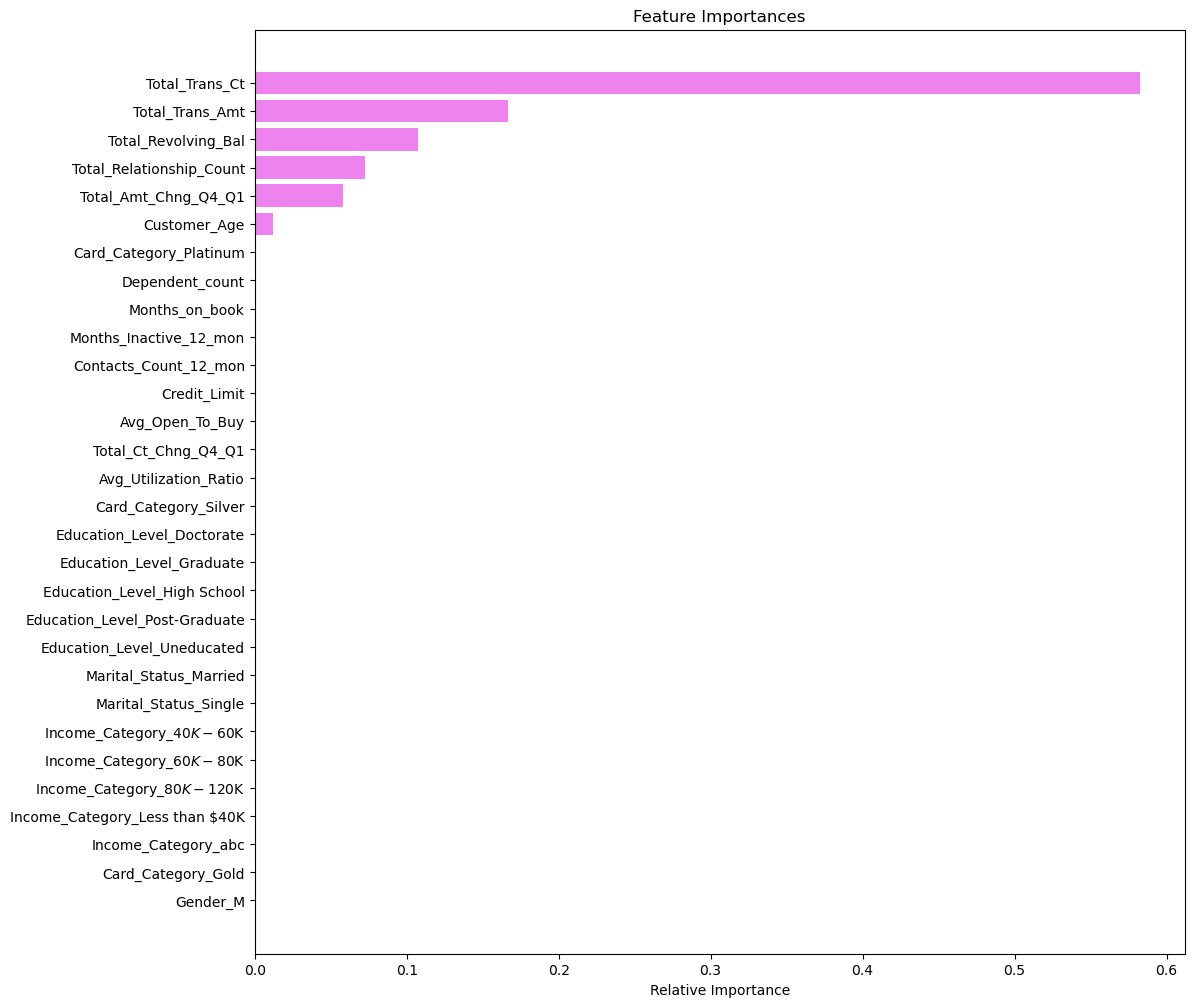

<IPython.core.display.Javascript object>

In [367]:
feature_names = X_train.columns
importances =tuned_decision_tree_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Total_Trans_Ct, Total_Revolving_Bal and Total_Trans_Amt are the 3 most contributing important features  in the dataset**

## Pipelines to build the final model


In [368]:
# creating a list of numerical variables and a transformer for numerical variables, which will apply simple imputer on the numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables and a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']


categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


# combine categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)


<IPython.core.display.Javascript object>

In [369]:
#Define target and independent variable from original dataset and drop the CLIENTNUM column
X = churn_data.drop(columns="Attrition_Flag",axis=1) 
Y = churn_data["Attrition_Flag"] 
X.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [370]:
#Replace erroneous values income category column
X["Income_Category"].replace("abc", np.nan, inplace=True) 

<IPython.core.display.Javascript object>

In [371]:
#Encode target variable accordingly
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)


<IPython.core.display.Javascript object>

In [372]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [373]:
# Creating new pipeline with best parameters
modelPipeline = Pipeline (
    steps=  [
        ("pre", preprocessor),
        (
            "DecisionTree",
            DecisionTreeClassifier(
               min_samples_leaf= 1,
                min_impurity_decrease= 0.001,
                max_leaf_nodes= 5,
                max_depth= 14
            ),
        )
    ]
)



<IPython.core.display.Javascript object>

In [374]:
# Fit the model on training data
modelPipeline.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
             

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

* The test recall is 0.96 meaning that the model is good at indentifying customers who have a high probability of attrition
* We saw in our analysis that customers with incomes of 120k+ and incomes of less than 40k$ are most likely to get attrited while customers with incomes of 40k to 60k and 60k to 80k are least likely to get attrited.Further investigation is needed and the bank should improve its offering to these category of customers 
* We saw in our analysis that customers who have the highest number of contacts with the bank are most likley to get attrited compared to customers who hav not contacted the bank for the last 12 months. These could be unhappy customers and the bank should see to it that they reach out and address any issues affecting such customers
* We observed that customers with more products with the bank are less likely to get attrited than customers with fewer products. The business should reach out to those customers with fewer products and educate and onboard them 
* The bank should have a watch on the total revolving balance because customers with zero to 1300 total revolving balance are most likely to get attrited
* The bank should proceed with caution and see which customers can be awarded a higher credit limit because we observed that customers with lower credit limit are most likely to get attrited than customers with a higher credit limit
* We also observed that customers with a higher transaction count in the last 12 months are less likely to get attrited than customers with a low transaction count hence the bank should try and identify such customers and reach out with new offerings and incentives in a bit to promote usage of credit cards

***